# Pre-Processing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
data = pd.read_csv('Iris.csv')
data.head(6)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa


In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})

In [6]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df
data = create_dummies(data,"Species")

In [7]:
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_0,Species_1,Species_2
0,1,5.1,3.5,1.4,0.2,0,1,0,0
1,2,4.9,3.0,1.4,0.2,0,1,0,0
2,3,4.7,3.2,1.3,0.2,0,1,0,0


In [8]:
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(y_train.shape)


(120,)


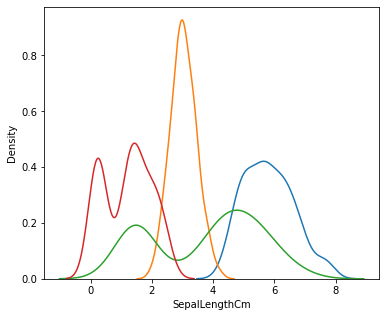

In [9]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(6, 5))

ax1.set_title('')
sns.kdeplot(X_train['SepalLengthCm'], ax=ax1)
sns.kdeplot(X_train['SepalWidthCm'], ax=ax1)
sns.kdeplot(X_train['PetalLengthCm'], ax=ax1)
sns.kdeplot(X_train['PetalWidthCm'], ax=ax1)

plt.show()

In [10]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [11]:
print(y_train.shape)
print(y_test)

(120, 1)
[[0]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [2]]


In [12]:
def sigmoid(x):
  return (1/(1 + np.exp(-x)))

def sigmoid_derivative(x):
  return x * (1 - x)

# Training Algorithm

In [13]:
epochs = 5
lr = 0.1
input_layer, hidden_layer, output_layer = 4,4,1

In [14]:
hidden_weights = np.random.uniform(size=(input_layer, hidden_layer))
hidden_bias = np.random.uniform(size=(1,hidden_layer))
output_weights = np.random.uniform(size=(hidden_layer, output_layer))
output_bias = np.random.uniform(size=(1,output_layer))

In [15]:
print("output weights: ",end='')
print(*output_weights)
print("hidden weights: ",end='')
print(*hidden_weights)

output weights: [0.44508967] [0.64215937] [0.9688867] [0.99421149]
hidden weights: [0.81946406 0.87493335 0.79148814 0.14294887] [0.89120913 0.66302004 0.33996167 0.41939294] [0.09955644 0.57221949 0.8237272  0.39092081] [0.42378052 0.36795318 0.42116351 0.21825566]


In [16]:
for i in range(epochs):
  hidden_layer_activation = np.dot(X_train,hidden_weights)
  hidden_layer_activation += hidden_bias
  hidden_layer_output = sigmoid(hidden_layer_activation)

  out_layer_activation = np.dot(hidden_layer_activation, output_weights)
  out_layer_activation =+ output_bias
  pred = sigmoid(out_layer_activation)
  print(pred)

  error = y_train - pred
  print(error)
  tmp_pred = error * sigmoid_derivative(pred)

  error_hidden_layer = tmp_pred.dot(output_weights.T)
  tmp_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

  output_weights += hidden_layer_output.T.dot(tmp_pred) * lr
  output_bias += np.sum(tmp_pred,axis=0,keepdims=True) * lr
  hidden_weights += X_train.T.dot(tmp_hidden_layer) * lr 
  hidden_bias += np.sum(tmp_hidden_layer,axis=0,keepdims=True) * lr

  hidden_layer_activation_tst = np.dot(X_test,hidden_weights)
  hidden_layer_activation_tst += hidden_bias
  hidden_layer_output_tst = sigmoid(hidden_layer_activation_tst)

  out_layer_activation_tst = np.dot(hidden_layer_activation_tst, output_weights)
  out_layer_activation_tst =+ output_bias
  output = sigmoid(out_layer_activation_tst)
  print("Output: ", *output)

  loss = np.sqrt(np.mean((y_test - output)**2))
  #print(loss)

[[0.53411724]]
[[ 1.46588276]
 [-0.53411724]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 1.46588276]
 [ 0.46588276]
 [-0.53411724]
 [-0.53411724]
 [ 0.46588276]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 1.46588276]
 [-0.53411724]
 [ 0.46588276]
 [-0.53411724]
 [ 1.46588276]
 [-0.53411724]
 [ 1.46588276]
 [-0.53411724]
 [-0.53411724]
 [ 1.46588276]
 [ 1.46588276]
 [ 1.46588276]
 [ 0.46588276]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 1.46588276]
 [ 1.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 0.46588276]
 [ 0.46588276]
 [ 1.46588276]
 [-0.53411724]
 [-0.53411724]
 [ 1.46588276]
 [ 0.46588276]
 [ 1.46588276]
 [-0.53411724]
 [-0.53411724]
 [-0.53411724]
 [ 1.46588276]
 [ 1.46588276]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 0.46588276]
 [-0.53411724]
 [ 0.46588276]
 [ 0.46588276]
 [ 1.46588276]
 [ 1.46588276]
 [ 1.46588276]
 [ 0.46588276]
 [ 0.46588276]
 [ 1.46588276]
 [ 0.46588276]
 [ 0.46588

In [17]:
print(pred)

[[0.89168978]]


In [18]:
print(output)
print(loss)

[[0.9015289]]
0.8695742460933555
